In [258]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [259]:
#Load the mnist Dataset
dataset = keras.datasets.mnist
dataset= dataset.load_data()
(x_train_full, y_train_full), (x_test, y_test) = dataset

In [260]:
#Split into train and validation set
x_train = x_train_full[:55000] / 255.0 #normalize Data
x_valid = x_train_full[55000:] / 255.0
y_train = y_train_full[:55000]
y_valid = y_train_full[55000:]

In [261]:
#Create Model using functional API
input_ = keras.layers.Input(shape=(28,28))
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(30, activation="relu")(flatten)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
output= keras.layers.Dense(10, activation="softmax")(hidden2)
model = keras.Model(inputs=[input_], outputs=[output])

In [262]:
#model = keras.Sequential(
#    [
#    layers.Flatten(input_shape=[28,28]),
#    layers.Dense(30, activation="relu"),
#    layers.Dense(15, activation="relu"),
#    layers.Dense(10, activation="softmax")
#    ])

In [263]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_22 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [264]:
model.compile(optimizer="sgd", loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [265]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.8120 - accuracy: 0.7709 - val_loss: 0.3184 - val_accuracy: 0.9166
Epoch 2/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.3446 - accuracy: 0.9017 - val_loss: 0.2408 - val_accuracy: 0.9344
Epoch 3/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2875 - accuracy: 0.9179 - val_loss: 0.2080 - val_accuracy: 0.9422
Epoch 4/10
55000/55000 [==============================] - 5s 86us/sample - loss: 0.2554 - accuracy: 0.9264 - val_loss: 0.1913 - val_accuracy: 0.9474
Epoch 5/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2325 - accuracy: 0.9331 - val_loss: 0.1768 - val_accuracy: 0.9484
Epoch 6/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.2142 - accuracy: 0.9379 - val_loss: 0.1663 - val_accuracy: 0.9546
Epoch 7/10
55000/55000 [==============================] -

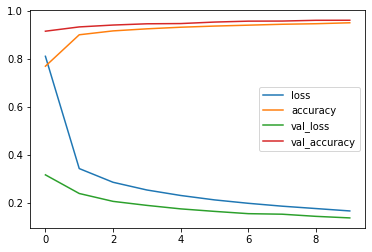

In [266]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]
plt.plot(loss, label="loss")
plt.plot(accuracy, label="accuracy")
plt.plot(val_loss, label="val_loss")
plt.plot(val_accuracy, label="val_accuracy")
plt.legend()

In [267]:
model.save("handwritten_recognition_model.h5")